## for문

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import warnings  
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


### 카테고리 및 금액 타입별 변동폭을 가지고 군집화
- 각 카테고리 및 금액타입별로 구매금액을 기준으로 이전/이후 분기 간의 감소/증가 고객 범주화(1-2 분기 간 짱감소/감소/유지/증가/짱증가 구분) 후 그 이전(1-2 분기)/이후(2-3 분기)의 변동폭을 계산해 둔 데이터를 불러와 군집화를 진행
- 군집화 label이 추가된 데이터 새로 저장함

In [48]:
bbcl = ['가구인테리어_잡화','가전_레저취미_멀티샵','교육문화_아동',
        '식품_생활','의류_이미용','침구_주방']
price_types = ['고가','중가','저가']

for i in bbcl:
    for j in price_types:
        # 데이터 불러오기
        data_org = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/{i}_{j}_전체 증감폭_df.csv', index_col = 0)
        data = data_org.iloc[:,:-1] 
        
        # 클러스터링 생성
        estimator = KMeans(n_clusters = 6)
        cluster_ids = estimator.fit_predict(data)
        cluster_ids
        
        # 저장
        data_org[f'{i}_{j}_clust_id'] = cluster_ids
        data_org.to_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/{i}_{j}_전체 증감폭_군집화포함_df.csv')

### 전체(카테고리 및 금액 타입이 합쳐진) 분기별 변동폭을 가지고 군집화 
- 전체 구매금액을 이전/이후 분기 간의 감소/증가 고객 범주화(1-2 분기 간 짱감소/감소/유지/증가/짱증가 구분) 후 그 이전(1-2 분기)/이후(2-3 분기)의 변동폭을 계산해 둔 데이터를 불러와 군집화 진행
- 군집화 label이 추가된 데이터 새로 저장함

In [65]:
data_org = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/total_cust_ratio.csv',index_col = 0)
data = data_org.iloc[:,:-1] 

# 클러스터링 생성
estimator = KMeans(n_clusters = 6)
cluster_ids = estimator.fit_predict(data)
cluster_ids

# 저장
data_org[f'전체_clust_id'] = cluster_ids
data_org.to_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/total_cust_ratio_전체 증감폭_군집화포함_df.csv')

#### 확인
- 데이터가 제대로 잘 만들어졌는지 확인 작업

In [50]:
data = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/교육문화_아동_중가_전체 증감폭_군집화포함_df.csv', index_col = 0)
data

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,교육문화_아동_중가_clust_id
CUSTNO,,,,,,,
1,-1,-1,0,0,0,0,0
2,-3,0,3,-3,3,-3,4
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19333,-2,-1,0,0,0,0,0
19334,-2,1,1,-3,3,-3,1
19335,0,-1,0,1,0,0,0


- 군집별 분포도 확인

In [51]:
data['교육문화_아동_중가_clust_id'].value_counts()

0    7644
4    2677
5    2500
3    2380
2    2026
1    1639
Name: 교육문화_아동_중가_clust_id, dtype: int64

In [66]:
pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/total_cust_ratio_전체 증감폭_군집화포함_df.csv')

,CUSTNO,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,전체_clust_id
0,1,0,0,-2,1,1,-2,5
1,2,2,-3,3,-3,3,-2,1
2,3,-1,-1,0,1,0,-1,4
3,4,-2,-1,2,0,0,-1,4
4,6,0,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...
18861,19333,-2,1,2,-2,-1,3,3
18862,19334,-2,1,-2,0,1,0,3
18863,19335,-2,0,1,0,-2,2,4
18864,19336,-1,0,-2,2,1,-3,2


## 군집화 LABLE 만 합치기

In [69]:
bbcl = ['가구인테리어_잡화','가전_레저취미_멀티샵','교육문화_아동',
        '식품_생활','의류_이미용','침구_주방']
price_types = ['고가','중가','저가']



# 빈데이터프레임 만들기

column_names = []
for i in bbcl:
    for j in price_types:
        # 데이터 불러오기
        column_names.append(f'{i}_{j}_clust_ids')

        
df = pd.DataFrame(columns = column_names, index = data.index)

for i in bbcl:
    for j in price_types:
        data_org = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/{i}_{j}_전체 증감폭_군집화포함_df.csv', index_col = 0)
        df[f'{i}_{j}_clust_ids']= data_org.iloc[:,-1]
df['전체_clust_ids'] = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/total_cust_ratio_전체 증감폭_군집화포함_df.csv',index_col = 0).iloc[:,-1]

df.to_csv('C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/전체_카테고리_분기별_군집화.csv')

## TRIAL

In [ ]:
import pandas as pd

food_중가 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소고객예측 프로젝트/second_projects/생성데이터/식품_생활_중가_전체 증감폭_df.csv', index_col = 0)
food_중가_78제외 = food_중가.iloc[:,:-1]
food_중가_78제외

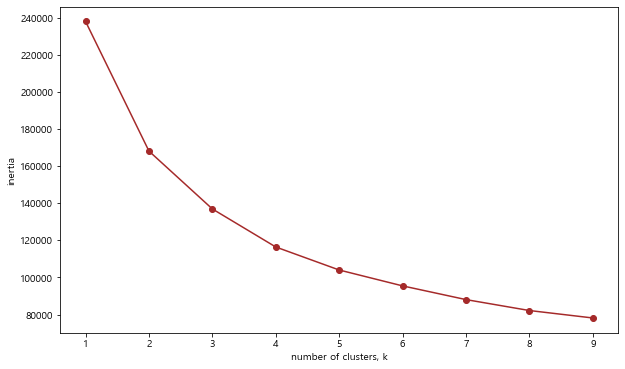

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k) 
    model.fit(food_중가_78제외)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize = (10,6))
plt.plot(range(1,10), inertias, '-o', color = 'brown')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
# plt.savefig('유동인구_군집화_시각화/최적군집개수.png')
plt.show()

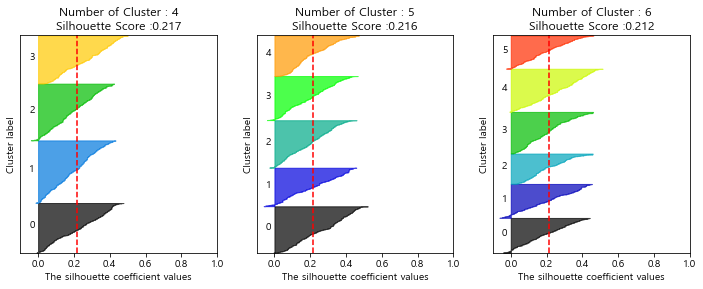

In [39]:
# 실루엣 계수

data = food_중가_78제외

import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

        
cluster_list = [4,5,6]
visualize_silhouette(cluster_list, data)

In [40]:
data = food_중가_78제외

## 군집화
import numpy as np
import warnings  
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지


# 클러스터링 생성
estimator = KMeans(n_clusters = 6)
cluster_ids = estimator.fit_predict(data)
cluster_ids



#주성분분석:: 차원축소
from sklearn.decomposition import PCA
import seaborn as sns

# 2차원으로 축소
pca = PCA(n_components=2) # n_components = 주성분의 갯수를 결정
pca.fit(data) # 각도를 찾음

# 축소된 차원으로 데이터를 변환
data2 = pd.DataFrame(data = pca.transform(data), columns=['pca1', 'pca2'])
# data2['와인이름'] = wine_df['와인이름']
# data2 = data2.set_index('와인이름')
display(data2)
pca.explained_variance_ratio_

,pca1,pca2
0,0.800071,0.781922
1,1.235898,-1.137262
2,1.097783,1.775570
3,0.977145,-2.979258
4,1.693341,-3.656346
...,...,...
18861,2.282212,-2.429682
18862,-0.830362,-1.204982
18863,-1.295270,-1.715237
18864,1.868807,-0.756649


array([0.46370311, 0.2900661 ])

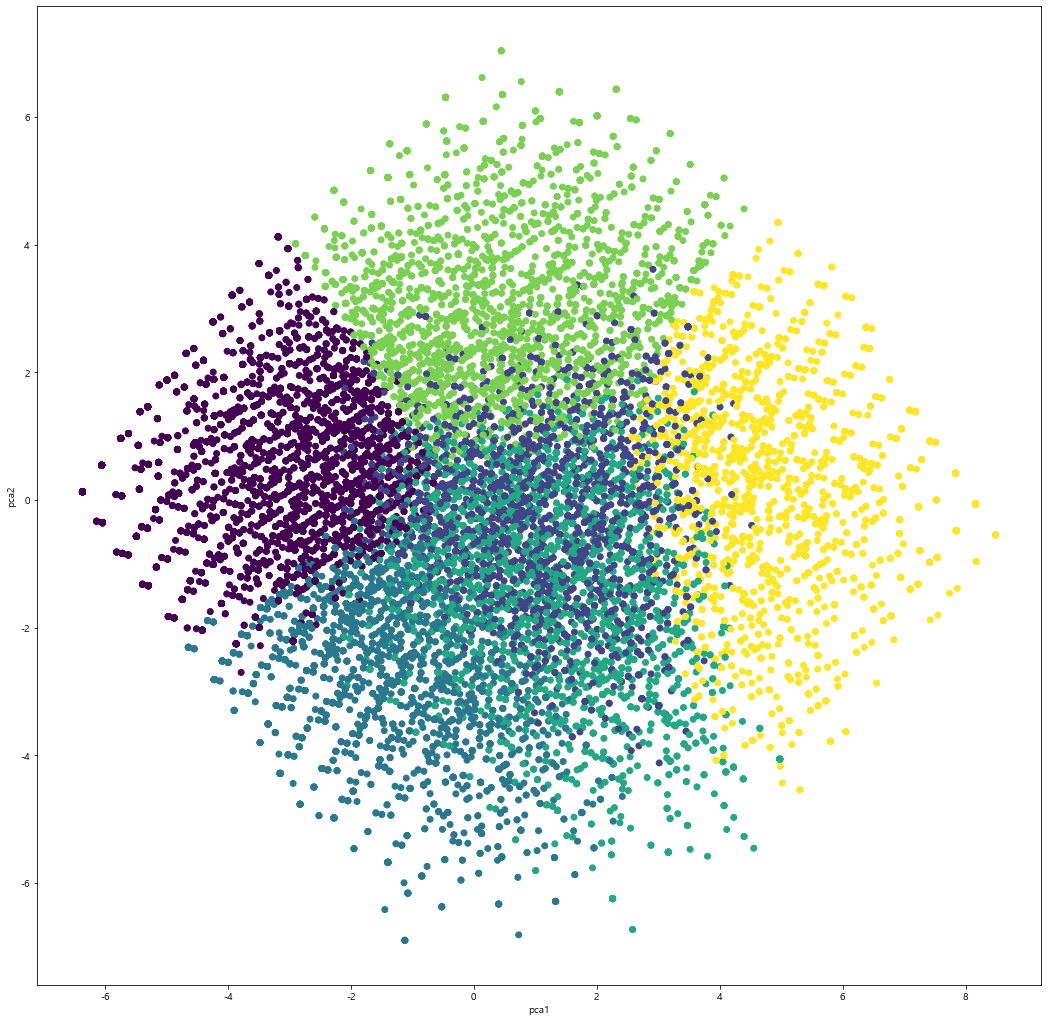

In [6]:
#시각화
# 플롯
plt.figure(figsize=(18,18))
plt.scatter(data2['pca1'], data2['pca2'], c=cluster_ids)
plt.xlabel("pca1")
plt.ylabel("pca2")


# 범례 달기
# for x, p1, p2 in data2.itertuples():
#     plt.annotate(x, (p1, p2))
# plt.axis('off')
# plt.savefig('유동인구_군집화7차원_cluster4개_글씨없음.png')    
plt.show()

In [41]:
data3 = food_중가_78제외.copy()
data3['clusterid'] = cluster_ids
data3

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,clusterid
CUSTNO,,,,,,
1,3,0,-2,-1,0,2
2,0,0,0,-1,1,2
3,0,-3,0,2,1,4
4,-3,1,2,-2,0,3
6,-1,1,0,-2,3,3
...,...,...,...,...,...,...
19333,-2,0,2,-3,0,5
19334,-2,0,-1,0,0,3
19335,-2,1,-1,0,0,3


In [11]:
data3[data3['clusterid']==0]

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,clusterid
CUSTNO,,,,,,,
1,-3,3,-2,1,-2,3,0
8,-1,2,-2,1,-1,-1,0
9,-2,3,-3,3,0,-2,0
11,-2,3,-3,1,-1,3,0
13,-2,3,-3,2,-2,2,0
...,...,...,...,...,...,...,...
19317,-3,3,-1,0,-2,2,0
19328,-2,1,0,0,-2,3,0
19329,-2,0,-1,3,-3,3,0


In [10]:
data3[data3['clusterid']==0].value_counts()

1_2증감폭 대비2_3변동폭  2_3증감폭 대비3_4변동폭  3_4증감폭 대비4_5변동폭  4_5증감폭 대비5_6변동폭  5_6증감폭 대비6_7변동폭  6_7증감폭 대비7_8변동폭  clusterid
-1               1                -1               1                -1                1               0            88
                                                                                      0               0            59
-3               3                -3               3                -3                3               0            56
 0               1                -1               1                -1                1               0            42
-3               3                -3               3                -3                2               0            35
                                                                                                                   ..
-1               0                -2               3                -3               -1               0             1
                                                   2          

In [13]:
data3[data3['clusterid']==0].describe()

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,clusterid
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.0
mean,-1.613376,1.998274,-1.886947,1.696656,-1.611003,1.121899,0.0
std,1.020630,0.962838,0.961580,1.113876,0.966156,1.361354,0.0
min,-3.000000,-1.000000,-3.000000,-2.000000,-3.000000,-3.000000,0.0
25%,-2.000000,1.000000,-3.000000,1.000000,-2.000000,0.000000,0.0
50%,-2.000000,2.000000,-2.000000,2.000000,-2.000000,1.000000,0.0
75%,-1.000000,3.000000,-1.000000,3.000000,-1.000000,2.000000,0.0
max,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.0


In [14]:
data3[data3['clusterid']==1].describe()

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,clusterid
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.0
mean,1.101274,-0.340711,-1.025151,0.759893,0.352783,-0.812542,1.0
std,1.264621,1.004157,1.034318,1.147622,1.084314,1.099878,0.0
min,-3.000000,-3.000000,-3.000000,-2.000000,-2.000000,-3.000000,1.0
25%,0.000000,-1.000000,-2.000000,0.000000,0.000000,-1.000000,1.0
50%,1.000000,0.000000,-1.000000,1.000000,0.000000,-1.000000,1.0
75%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
max,4.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.0


In [15]:
data3[data3['clusterid']==2].describe()

,1_2증감폭 대비2_3변동폭,2_3증감폭 대비3_4변동폭,3_4증감폭 대비4_5변동폭,4_5증감폭 대비5_6변동폭,5_6증감폭 대비6_7변동폭,6_7증감폭 대비7_8변동폭,clusterid
count,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.0
mean,1.139681,-0.563913,-1.124861,2.035939,-2.117080,1.567618,2.0
std,1.312587,1.090039,1.051477,0.945418,0.799602,1.182465,0.0
min,-2.000000,-3.000000,-3.000000,-1.000000,-3.000000,-1.000000,2.0
25%,0.000000,-1.000000,-2.000000,1.000000,-3.000000,1.000000,2.0
50%,1.000000,0.000000,-1.000000,2.000000,-2.000000,2.000000,2.0
75%,2.000000,0.000000,0.000000,3.000000,-2.000000,3.000000,2.0
max,4.000000,2.000000,2.000000,4.000000,0.000000,4.000000,2.0


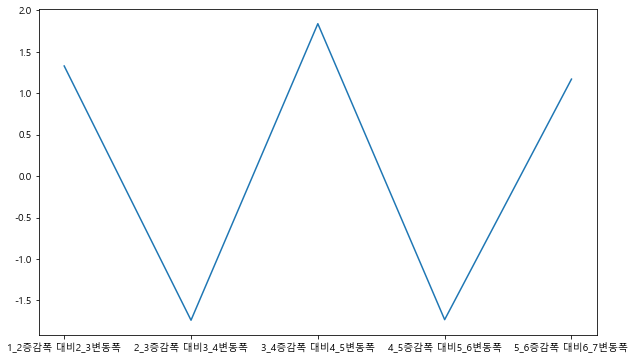

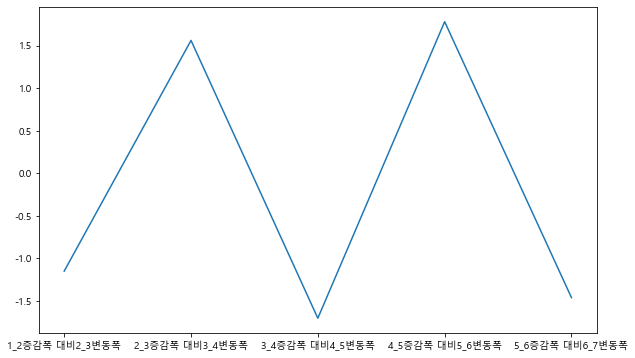

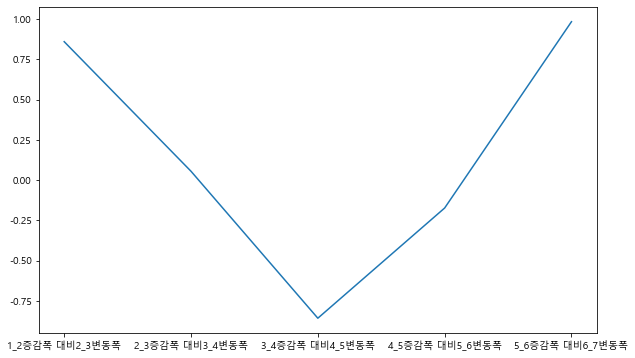

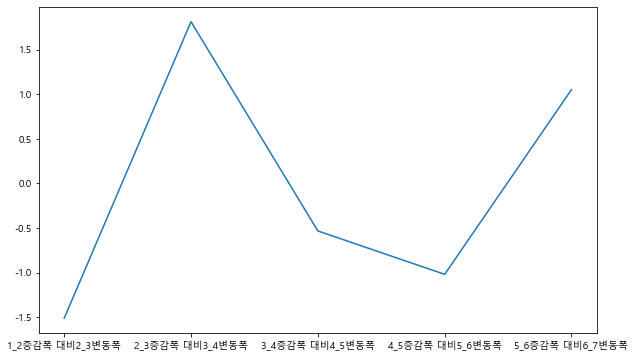

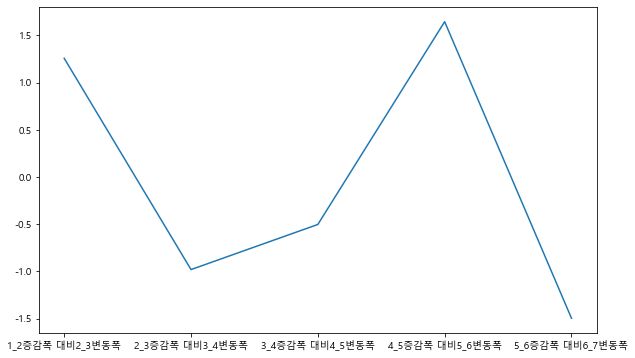

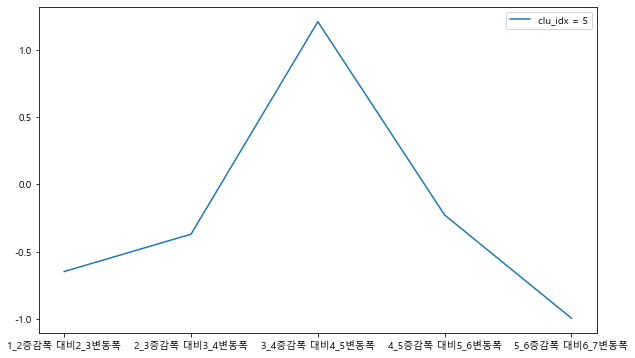

In [42]:
for clu_idx in range(6):
    plt.figure(figsize = (10,6))
    
    plt.plot(data[data['교육문화_아동_중가_clust_id'] == clu_idx].iloc[:,:-1].describe().loc['mean'], label = f'clu_idx = {clu_idx}')
    
plt.legend()
plt.show()

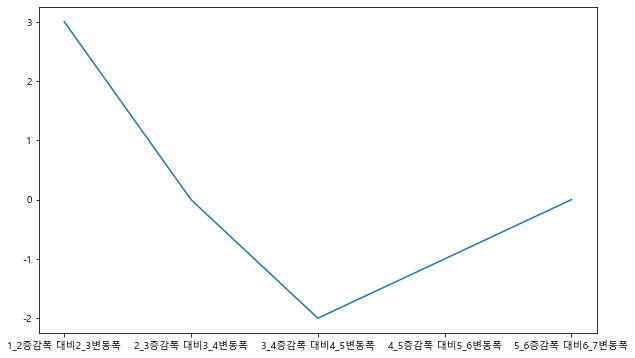

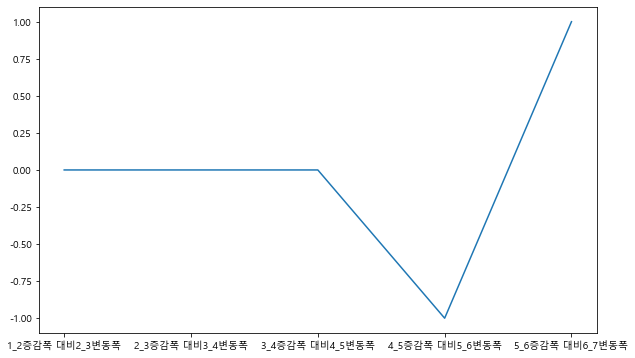

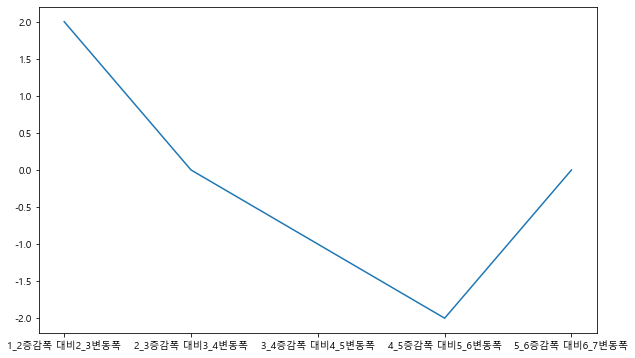

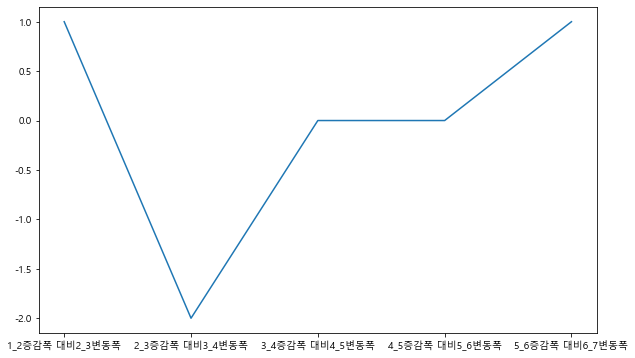

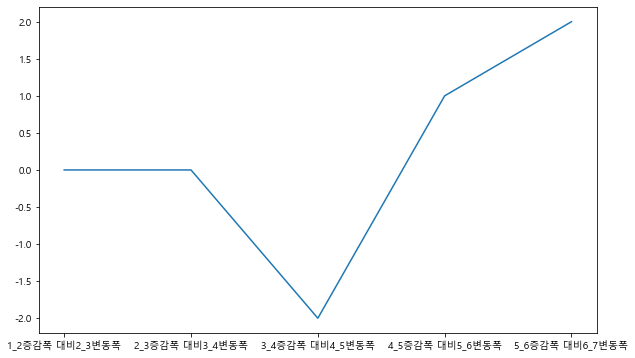

In [47]:
x = data[data['교육문화_아동_중가_clust_id']==0].iloc[:5,:-1]
for idx in range(5):
    plt.figure(figsize = (10,6))
    
    plt.plot(x.iloc[idx])
    

In [1]:
import numpy as np

np.log1p(-200000)

C:\Users\admin\AppData\Local\Temp\ipykernel_5524\1169781723.py:3: RuntimeWarning: invalid value encountered in log1p
  np.log1p(-200000)


nan